In [1]:
import os
os.chdir('../')
import os.path as op

import mne
import numpy as np

from scripts.config import meg_dir, rst_dir, subjects_dir, spacing

%matplotlib qt

In [2]:
# NOTE: change the name to the intended cluster result
clu_fname = op.join(rst_dir, 'left_auditory_vs_visual_0_to_None.npz')

# prepare spatial connectivity
fsaverage_src = mne.read_source_spaces(
    op.join(subjects_dir, 'fsaverage', 'bem', 'fsaverage-5-src.fif'))
fsaverage_vertices = [s['vertno'] for s in fsaverage_src]

# get info
info_data = mne.read_source_estimate(
    op.join(meg_dir, 'sample', 'sample_audvis-dSPM-ico5-inverse-morph-filt-sss-aud_left_eq'))
tstep = info_data.tstep

# allow_pickle=True when you are certain that the data are not malicious!
cluster_result = np.load(clu_fname, allow_pickle=True)
clu = (cluster_result['t_obs'], cluster_result['clusters'],
       cluster_result['cluster_pv'], cluster_result['H0'])
good_cluster_inds = np.where(cluster_result['cluster_pv'] < 0.05)

os.environ["SUBJECTS_DIR"] = subjects_dir

In [3]:
stc_all_cluster_vis = mne.stats.summarize_clusters_stc(
    clu,
    tstep=tstep,
    vertices=fsaverage_vertices,
    subject='fsaverage')

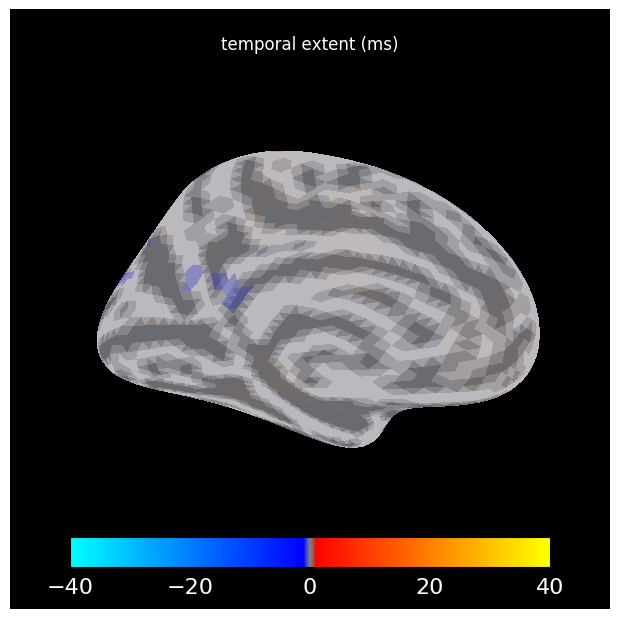

In [5]:
# it's unrealistic but beautiful ?!
stc_all_cluster_vis.plot(hemi='lh', views='med', time_label='temporal extent (ms)', size=(800, 800),
    smoothing_steps=5, clim=dict(kind='value', pos_lims=[0, 1, 40]), backend='matplotlib')  # matplotlib backend is only for notebook demonstration, use PySurfer (backend='auto') for interactive plotting.)

In [ ]:
stc_all_cluster_vis.plot(hemi='lh', views='med', time_label='temporal extent (ms)', size=(800, 800),
    smoothing_steps=5, clim=dict(kind='value', pos_lims=[0, 1, 40]),backend='matplotlib')  # matplotlib backend is only for notebook demonstration, use PySurfer (backend='auto') for interactive plotting.